<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

In [69]:
# Link to dataset:
# https://archive.ics.uci.edu/dataset/236/seeds

# Dataset contains these columns:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

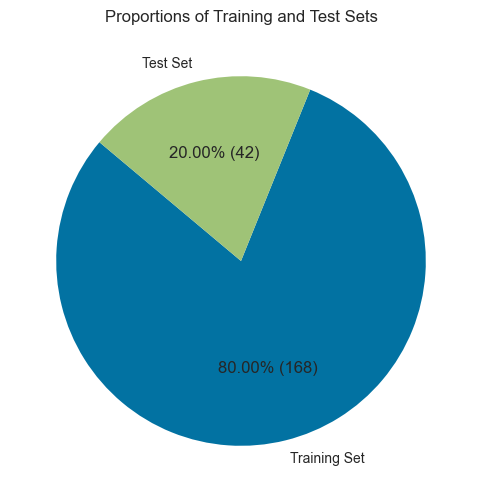

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into X and y
X = data.drop('Type', axis=1)
y = data["Type"] 

# Stratified Split of X and y into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot Train and Test Proportions in a Pie Chart
train_size = len(X_train)
test_size = len(X_test)

sizes = [train_size, test_size]
labels = ['Training Set', 'Test Set']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p, p*sum(sizes)/100), startangle=140)
plt.title('Proportions of Training and Test Sets')

plt.show()

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** 
I decided to use the StandardScaler scaler. 

**Explain your choice of scaler for the dataset:** I decided to use StandardScaler because the scaler scales each feature independantly of the others. Each feature is also on different scales as they each measure a different quality of the kernel, so we need to scale the data for accurate moddeling and to avoid one feature causing the model to overfit.


**Justify your decision based on the characteristics of the data and the requirements of the algorithm being used:** This scaler is useful because each feature in this dataset is measured with a different scale/range of measurement, and so the scaler will compact the data in a way that will still preserve the integrity and shape of the data while not allowing a specific feature to become overrepresented or have too much influence on the model chosen (helps reduce in the influence of outliers). This is especially true in the case of algorithms for models that prioritize the scale of data for classification, because this scaler converts the data to have a mean of 0 and standard variance of 1. 

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [71]:
from sklearn.svm import SVC

svc = SVC()

<font color='Green'><b>Answer:</b></font>

- **1.3** .....................

**Identify the model that you believe is most suitable for the dataset:** I believe that the SVC model is the most suitable model for this dataset.

**Provide a justification for your choice based on the dataset's characteristics** I think SVC is best for this dataset because it performs very well with data that has many features (multivariate). As this dataset had 7 different features, this will work well. Likewise, the data has a small amount of data with only 200 samples, so SVC will be able to work well as it does not work well with a large amount of samples. SVC is also good at not overfitting which is important as this dataset has real world data, which means that there could be noise. 

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Constructing the pipeline
pipe = Pipeline([
        ('preprocessor', StandardScaler()),
        ('svc', svc)
    ]              
) 

param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search_best_params = grid_search.best_params_

print("Grid Search Results with Original Data (accuracy):")
print(f"Best Parameters after PCA: {grid_search_best_params}")
print(f"Test Score: {grid_search.score(X_test, y_test)}")
print(f"Best accuracy from GridSearch: {grid_search.best_score_}")


Grid Search Results with Original Data (accuracy):
Best Parameters after PCA: {'svc__C': 5, 'svc__gamma': 0.01}
Test Score: 0.8809523809523809
Best accuracy from GridSearch: 0.946524064171123


### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

# Implement Dimensionality Reduction (PCA) on X_train and X_test
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state=42, test_size=0.2)

# Constructing the pipeline
pipe_pca = Pipeline([
    ('preprocessor', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svc', SVC())
])

param_grid_pca = {
    'svc__C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
}

grid_search_pca = GridSearchCV(estimator=pipe_pca, param_grid=param_grid_pca, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train_pca, y_train_pca)

# Compare model performance with original higher-dimensional data
print("Grid Search Results with Original Data (accuracy):")
print(f"Best Parameters before PCA: {grid_search_best_params}")
print(f"Test Score: {grid_search.score(X_test, y_test)}")
print(f"Best accuracy from GridSearch: {grid_search.best_score_}")

print("\nGrid Search Results with PCA-reduced Data (accuracy):")
print(f"Best Parameters after PCA: {grid_search_pca.best_params_}")
print(f"Test Score: {grid_search_pca.score(X_test_pca, y_test)}")
print(f"Best accuracy from GridSearch: {grid_search_pca.best_score_}")

Grid Search Results with Original Data (accuracy):
Best Parameters before PCA: {'svc__C': 5, 'svc__gamma': 0.01}
Test Score: 0.8809523809523809
Best accuracy from GridSearch: 0.946524064171123

Grid Search Results with PCA-reduced Data (accuracy):
Best Parameters after PCA: {'svc__C': 100, 'svc__gamma': 0.1}
Test Score: 0.8809523809523809
Best accuracy from GridSearch: 0.9049910873440284


<font color='Green'><b>Answer:</b></font>

- **1.5**

**Justify your selection based on the characteristics of the seeds dataset:** I decided to use PCA for several reasons. Every feature  contains continuous values, which PCA performs well with. The dataset also contains several features that would almost definitely correlate with eachother, such as area, perimeter, length, and width of a kernel, which goes well with PCA's ability to find correlations between features and turn them into uncorrelated variables. This is helpful in classification tasks as it keeps the most significant information while reducing the number of dimensions.

**Compare the model's performance with the original higher-dimensional data:** Both grid searches had different best parameters, with the original data having the best parameters of {'svc__C': 5, 'svc__gamma': 0.01} and PCA-reduced data having best parameters of {'svc__C': 100, 'svc__gamma': 0.1}. They also both had the same   test score at 0.8809523809523809 each. They differ in that the non-PCA grid search had a better best grid search accuracy score with 0.946524064171123, while the grid search PCA had a best grid search score of 0.9049910873440284 This shows that the higher dimensional data performs better in the grid search than the lower dimensional data, but perform the same when given new data.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

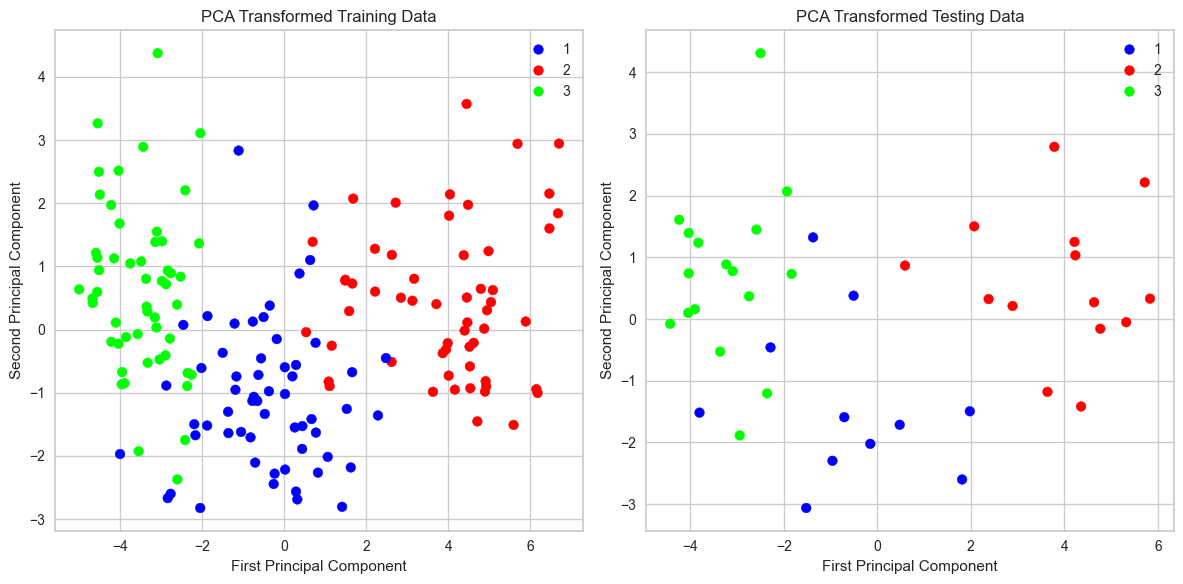

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Training Graph
scatter_X_train = axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='brg', c=y_train)
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].set_title('PCA Transformed Training Data')
axs[0].legend(handles=scatter_X_train.legend_elements()[0], labels=set(y_train))

# Testing Graph
scatter_X_test = axs[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], cmap='brg', c=y_test)
axs[1].set_xlabel('First Principal Component')
axs[1].set_ylabel('Second Principal Component')
axs[1].set_title('PCA Transformed Testing Data')
axs[1].legend(handles=scatter_X_test.legend_elements()[0], labels=set(y_test))

plt.tight_layout()
plt.show()

## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

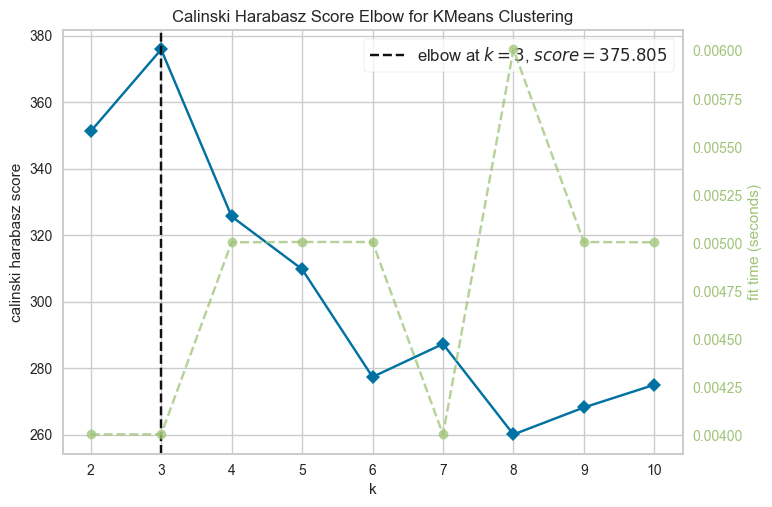

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [75]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Constructing the pipeline
pipe_kmeans = Pipeline([
    ('preprocessor', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Using KelbowVisualizer to determine the optimal number of clusters
visualizer = KElbowVisualizer(pipe_kmeans.named_steps['kmeans'], metric='calinski_harabasz')

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1** 

**Explain the results of the `KelbowVisualizer`:** The results show that there is an elbow at k=3, meaning that k=3 (3 clusters) is the point here the Calinski Harabasz score is highest. The score then decreases as the number of k (clusters) increases or goes back to 2. This suggests that the data is best clustered into three groups. 

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [76]:
k = 3

# Constructing the pipeline
pipe_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k, random_state=42)) 
])

pipe_kmeans.fit(X_train)

pipe_kmeans_labels = pipe_kmeans.predict(X_train)


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [77]:
# Reduce diemnsionality
pca = PCA(n_components = 2)
X_train_pca = pd.DataFrame(data=pca.fit_transform(X_train), columns=['PC1', 'PC2'])
X_train_pca

,PC1,PC2
0,-3.535150,1.117794
1,4.992015,0.456246
2,-3.022692,1.433016
3,-0.287588,-2.249466
4,-3.943574,-0.812204
...,...,...
163,4.469326,-0.249624
164,-1.239869,-0.922291
165,4.415756,0.134654
166,-2.659024,-2.335282


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

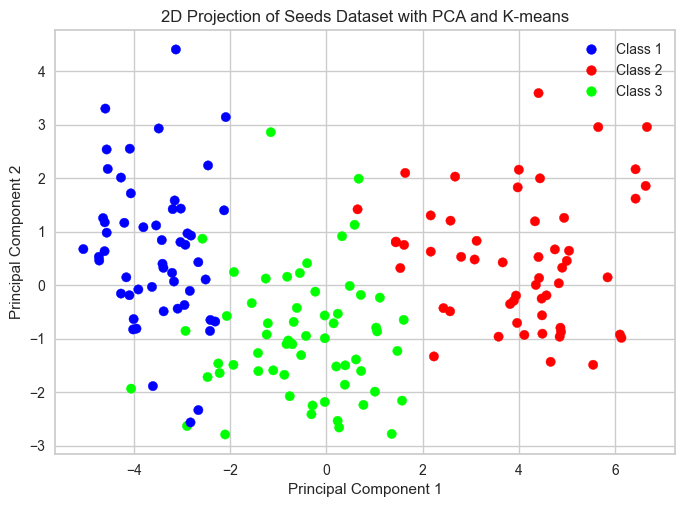

In [81]:
# Graph Creation
plt.scatter(X_train_pca['PC1'], X_train_pca['PC2'], c=pipe_kmeans_labels, cmap='brg', s=45)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Seeds Dataset with PCA and K-means')
plt.legend(handles=scatter_X_test.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'], loc='upper right', fontsize="10")

plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** 

The clustering results show that most datapoints within the three classes are packed together in a group, which indicates a  degree of similarity within the class. This is especially true for Class 1 (blue) and 2 (red). Class 3 (green), however, is more spread out and had datapoints closer to and intermingling with both Class 1 (blue) and 3 (red), indicating higher variablity within the class.

Because each cluster is relatively seperated with limited overlap, it must mean that the K-means algorithm sucessfully identified distinct groups of seeds within the data. Although there is some overlap between the outter edges of Class 3 (green) and the other two classes, so it was not perfect and indicated some variation in the groups.